# **MAS473 Programming Recitation (Week 11)**

## **Contents**

We will cover

- **Gaussian Naive Bayes Classifier**
- **Principal Component Analysis**

## **1. Gaussian Naive Bayes Classifier**
Gaussian naive Bayes classifier assumes that the likelihood functions are Gaussian. Here, we use it for classfying synthetic data generated by 'make_circles'.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

The followings are our
synthetic data.

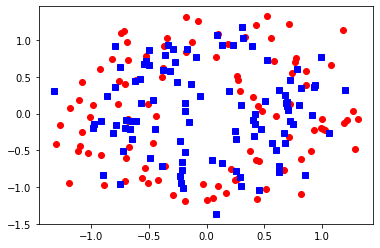

In [ ]:
X, y = make_circles(n_samples=200, noise=0.3, random_state=72)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

import matplotlib.pyplot as plt
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.show()

Import and declare Gaussian naive Bayes classifier. Then use 'fit' method to train the model.

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

We already learned how to plot the decision boundary in the classification lectures.

Text(0.5, 1.0, 'Decision Boundary by GNB')

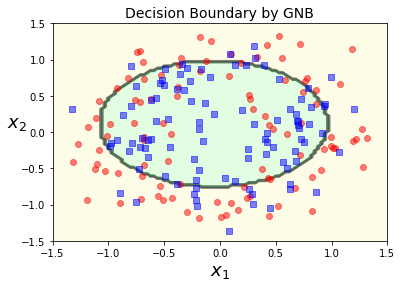

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 1.5, -1.5, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(6,4))
plot_decision_boundary(clf, X, y)
plt.title("Decision Boundary by GNB", fontsize=14)

Lastly, use accuracy_score to measure performance of our model.

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy for GNB=', accuracy_score(y_test, y_pred))

Accuracy for GNB= 0.7


## **2. Principal Component Analysis**
At first, we again start with a simple classification problem, iris data, which has 4 features. Here, we want to extract 2 major features from the original 4 features of the iris data. 

In this part, we extract features from the original features. Then we construct a classifier using these extracted features.

In [13]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
import pandas as pd

from time import time

iris = datasets.load_iris()
X,y = iris["data"], iris["target"]
tr_X, ts_X, tr_y, ts_y = train_test_split(X,y, test_size = 0.25, random_state = 10)
n_components = 2
pca0 = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(tr_X)

tr_X_pca0 = pca0.transform(tr_X)
ts_X_pca0 = pca0.transform(ts_X)

Visualize the iris data with a heuristic feature selection and with the extracted features from PCA. However, in this case, the dataset is already almost separable when we use the petal width and length. Thus, there is no need to do PCA for data reduction in this case.

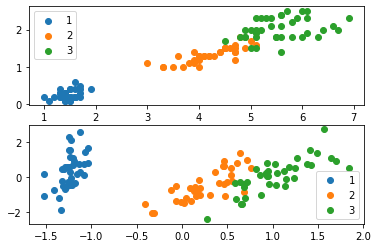

In [14]:
ax1 = plt.subplot(211)
index1 = np.where(tr_y == 0)
index2 = np.where(tr_y == 1)
index3 = np.where(tr_y == 2)

ax1.scatter(tr_X[index1][:,2],tr_X[index1][:,3], label = '1')
ax1.scatter(tr_X[index2][:,2],tr_X[index2][:,3], label = '2')
ax1.scatter(tr_X[index3][:,2], tr_X[index3][:,3], label = '3')
ax1.legend()

ax2 = plt.subplot(212)
index1 = np.where(tr_y == 0)
index2 = np.where(tr_y == 1)
index3 = np.where(tr_y == 2)

ax2.scatter(tr_X_pca0[index1][:,0],tr_X_pca0[index1][:,1], label = '1')
ax2.scatter(tr_X_pca0[index2][:,0],tr_X_pca0[index2][:,1], label = '2')
ax2.scatter(tr_X_pca0[index3][:,0], tr_X_pca0[index3][:,1], label = '3')
ax2.legend()

Next, we will try to train a logistic regression model on a hand-written number dataset reducing the dimensions with PCA.  
First, import the dataset as follow. Actually, it is a simplified version of the whole MNIST data.  
While the original data has $28\times 28$ features with $42000$ data, the simplified data has only $8\times 8$ features with $1797$ data.

In [15]:
mnist = datasets.load_digits()
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


For visualization of the number, use 'imshow' function of matplotlib. To do this, we need to reshape a $64\times 1$ features array into $8\times 8$ array.

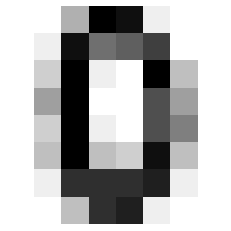

0


In [16]:
some_digit = X[166]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()
print(y[166])

Similar as above, split the datset into the training set and the test set. Next, use PCA for dimension reduction of inputs.

In [ ]:
tr_X, ts_X, tr_y, ts_y = train_test_split(X,y, test_size = 0.25, random_state = 10)
n_components = 36
t0 = time()
pca1 = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(tr_X)
print("Consumped time is %0.3fs" % (time() - t0))

tr_X_pca1 = pca1.transform(tr_X)
ts_X_pca1 = pca1.transform(ts_X)

Consumped time is 0.044s


Now, bulid two logistic regression models which use the original data and the reduced data respectively.

In [ ]:
lr = LogisticRegression(C=10)
t0 = time()
lr.fit(tr_X,tr_y)
print("The whole data is done in %0.3fs"%(time() - t0))
pca_lr = LogisticRegression(C = 10)
t1 = time()
pca_lr.fit(tr_X_pca1, tr_y)
print("The reduced data is done in %0.3fs"%(time() - t1))
print(lr.score(ts_X,ts_y))
print(pca_lr.score(ts_X_pca1,ts_y ))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The whole data is done in 0.282s
The reduced data is done in 0.225s
0.9511111111111111
0.9533333333333334


For the simplified version of mnist set, PCA is not helpful for training time of classification problem. 

Lastly, we use the original mnist dataset. In this case, the training time is considerably reduced but the performance is worse. This is a kind of trade-off relation.

In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X,y = mnist["data"], mnist["target"]
tr_X, ts_X, tr_y, ts_y = train_test_split(X,y, test_size = 0.25, random_state = 10)
n_components = 36
t0 = time()
pca1 = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(tr_X)
print("Consumped time is %0.3fs" % (time() - t0))

tr_X_pca1 = pca1.transform(tr_X)
ts_X_pca1 = pca1.transform(ts_X)
lr = LogisticRegression(C=10)
t0 = time()
lr.fit(tr_X,tr_y)
print("The whole data is done in %0.3fs"%(time() - t0))
pca_lr = LogisticRegression(C = 10)
t1 = time()
pca_lr.fit(tr_X_pca1, tr_y)
print("The reduced data is done in %0.3fs"%(time() - t1))
print(lr.score(ts_X,ts_y))
print(pca_lr.score(ts_X_pca1,ts_y ))

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


Consumped time is 6.165s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The whole data is done in 41.077s
The reduced data is done in 7.200s
0.9196
0.8993142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **References**
#### [1] A. Geron. Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow (2nd), O' Reilly (2019).
(번역본 : 핸즈온 머신러닝 2판)
#### [2] https://m.blog.naver.com/PostView.nhn?blogId=kenshinhm&logNo=220747592642&proxyReferer=https%3A%2F%2Fwww.google.com%2F https://datascienceschool.net/view-notebook/c19b48e3c7b048668f2bb0a113bd25f7/
